In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import folium


In [ ]:
!pip install gdown

# Loading Data

In [ ]:
# eaton cal fire damage inspection (DINS) data
! gdown --id 1MMGa4geDSRNIQx3RPw8WcKMM42TUxfTG

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1MMGa4geDSRNIQx3RPw8WcKMM42TUxfTG
To: /content/POSTFIRE_MASTER_DATA_SHARE_8280858962643132259.csv
100% 7.90M/7.90M [00:00<00:00, 34.1MB/s]


In [ ]:
eaton_dins_df = pd.read_csv('/content/POSTFIRE_MASTER_DATA_SHARE_8280858962643132259.csv')
display(eaton_dins_df.head())

,OBJECTID,* Damage,* Street Number,* Street Name,"* Street Type (e.g. road, drive, lane, etc.)","Street Suffix (e.g. apt. 23, blding C)",* City,State,Zip Code,* CAL FIRE Unit,...,Fire Name (Secondary),APN (parcel),Assessed Improved Value (parcel),Year Built (parcel),Site Address (parcel),GLOBALID,Latitude,Longitude,x,y
0,118979,No Damage,2006,Newport,Avenue,blding B,Pasadena,CA,91103.0,LAC,...,NaN,5.825008e+09,219347.0,1947.0,"2006 NEWPORT AVE, PASADENA, CA 91103",0cdd3d45-da5c-4f33-a279-f942862e7e5d,34.180198,-118.158094,-1.315330e+07,4.053024e+06
1,103991,No Damage,530,Ventura,Street,blding B,Altadena,CA,91001.0,LAC,...,NaN,5.828015e+09,49689.0,1946.0,"530 VENTURA ST, ALTADENA, CA 91001",dff08b25-11f0-4be3-a6c2-6a36d7fc2bc1,34.191183,-118.160807,-1.315360e+07,4.054502e+06
2,111153,Destroyed (>50%),2480,Lincoln,Avenue,blding B,Altadena,CA,91001.0,LAC,...,NaN,5.828023e+09,65980.0,1932.0,"2476 LINCOLN AVE, ALTADENA, CA 91001",ba3d4613-ca8c-41e2-af6f-048dbca178e9,34.188166,-118.159110,-1.315341e+07,4.054096e+06
3,112149,Destroyed (>50%),2480,Lincoln,Avenue,blding A,Altadena,CA,91001.0,LAC,...,NaN,5.828023e+09,65980.0,1932.0,"2476 LINCOLN AVE, ALTADENA, CA 91001",5df5033a-e20b-4f7b-86d6-86a0a43b8b60,34.188207,-118.159046,-1.315340e+07,4.054102e+06
4,102663,No Damage,617,Devrian,Place,NaN,Altadena,CA,91001.0,LAC,...,NaN,5.829024e+09,140229.0,1947.0,"617 DEVIRIAN PL, ALTADENA, CA 91001",7fd714f1-2f38-4215-84d4-bc9223fa657e,34.197640,-118.159658,-1.315347e+07,4.055371e+06


In [ ]:
# palisades damage inspection (DINS) data from la county
! gdown --id 1U8x-Y6PDAh3fVhn_2FvnMTs7LEvnYsyK

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1U8x-Y6PDAh3fVhn_2FvnMTs7LEvnYsyK
To: /content/DINS_2025_Palisades_Public_View_619106762761198766.csv
100% 1.44M/1.44M [00:00<00:00, 96.6MB/s]


In [ ]:
palisades_dins_df = pd.read_csv('/content/DINS_2025_Palisades_Public_View_619106762761198766.csv')
display(palisades_dins_df.head())

,OBJECTID,GLOBALID,* Damage,* Structure Type,x,y
0,1,749289c2-99a6-4d08-a870-16a6e499021e,Destroyed (>50%),Single Family Residence Multi Story,-1.320913e+07,4.034057e+06
1,2,12de8e53-d11c-40c4-b628-d861d62cc061,Destroyed (>50%),Single Family Residence Multi Story,-1.320911e+07,4.034052e+06
2,4,3d521301-742c-4009-8230-cfff2f4b5125,Destroyed (>50%),Multi Family Residence Multi Story,-1.320890e+07,4.034094e+06
3,5,11e11323-9a48-41c7-9d22-12ae0f054089,Destroyed (>50%),Single Family Residence Single Story,-1.320880e+07,4.034014e+06
4,6,0023c6d1-86f7-44bb-afaa-00e36c6a9538,Destroyed (>50%),Single Family Residence Single Story,-1.320873e+07,4.034004e+06


In [6]:
! gdown --id 11SoxbOVr8RMuk4kos3cL9lt_ww6-VUHv

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=11SoxbOVr8RMuk4kos3cL9lt_ww6-VUHv
From (redirected): https://drive.google.com/uc?id=11SoxbOVr8RMuk4kos3cL9lt_ww6-VUHv&confirm=t&uuid=06b543d6-3364-4d4e-84f4-b3d50b4ee6e2
To: /content/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv
100% 118M/118M [00:01<00:00, 104MB/s]


In [13]:
zhvi = pd.read_csv('/content/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
zhvi.info()
zhvi.describe()
zhvi.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26313 entries, 0 to 26312
Columns: 317 entries, RegionID to 2025-08-31
dtypes: float64(308), int64(3), object(6)
memory usage: 63.6+ MB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31,2025-06-30,2025-07-31,2025-08-31
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,212188.813406,...,505406.433789,505829.394376,506257.775948,505932.894893,505018.537307,503212.181421,501001.404279,498385.552048,496296.634639,495168.746988
1,61148,2,8701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,115971.651726,...,539607.009953,541369.342794,541929.400960,543877.740055,546201.021491,549536.660797,552397.132694,555002.334289,556841.151410,558123.132215
2,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,104601.524243,...,282857.006137,282121.675470,281505.973120,280877.040414,280038.210222,279071.723229,278261.068101,277252.997868,276304.466051,275361.674914
3,62080,4,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,174036.446414,...,537444.620037,534784.807834,532292.756977,532161.333955,531815.804643,531702.699902,532095.555699,534167.105799,536925.314390,538597.597205
4,91733,5,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,103494.335586,...,276232.058988,275889.573186,275644.663560,275238.784051,274372.836749,273324.026537,272422.992991,271412.725712,270492.483216,269609.409336


In [7]:
! gdown --id 1XI1h9rLCT45FSfvwZDGkFG1dROW46zqk

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1XI1h9rLCT45FSfvwZDGkFG1dROW46zqk
To: /content/CalFire_Perimeters_(NIFC_FIRIS)_Public_View_-_Fire_Extent_Layer.csv
100% 1.03k/1.03k [00:00<00:00, 4.41MB/s]


In [12]:
fire_perimeters_df = pd.read_csv('/content/CalFire_Perimeters_(NIFC_FIRIS)_Public_View_-_Fire_Extent_Layer.csv')
display(fire_perimeters_df.head())

,OBJECTID,GlobalID,type,source,poly_DateCurrent,mission,incident_name,incident_number,area_acres,description,FireDiscoveryDate,CreationDate,EditDate,displayStatus
0,1272,feb591e5-3665-47a4-b745-5787b15b5c84,Heat Perimeter,FIRIS,2025/01/09 05:35:41.395+00,CA-LFD-SUNSET-N40Y,NaN,NaN,42.770648,FIRIS Perimeter,NaN,2025/01/09 05:33:51+00,NaN,Inactive
1,1278,6fce1f7a-133e-4533-939d-2d3f9fe03638,Heat Perimeter,CAL FIRE INTEL FLIGHT DATA,2025/01/09 23:43:22+00,HURST,HURST,NaN,831.390000,Mixed Methods,NaN,NaN,NaN,Inactive
2,1283,c39f3bf1-3f11-4357-9e52-208e03ec1087,Heat Perimeter,FIRIS,2025/01/10 01:25:52.899+00,CA-VNC-KENNETH-N40Y,NaN,NaN,959.722647,FIRIS Perimeter,NaN,2025/01/10 01:24:12+00,NaN,Inactive
3,1289,b4d14153-fb41-4e5e-8be6-4d910df154b6,Heat Perimeter,FIRIS,2025/01/11 07:10:56.707+00,CA-LFD-EATON-N40Y,NaN,NaN,13993.151114,FIRIS Perimeter,NaN,2025/01/11 07:09:33+00,NaN,Inactive
4,1290,77e24e42-336b-4743-8a60-ae9b5cb26aa1,Heat Perimeter,FIRIS,2025/01/11 15:38:33.972+00,CA-LFD-PALISADES-N40Y,NaN,NaN,22660.483014,FIRIS Perimeter,NaN,2025/01/11 15:36:50+00,NaN,Inactive


In [8]:
! gdown --id 1hZOSsuxOCOfDv3ErGS3UZ38i8MFRBXyF

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1hZOSsuxOCOfDv3ErGS3UZ38i8MFRBXyF
To: /content/LA_County_ZIP_Codes.csv
100% 13.6k/13.6k [00:00<00:00, 37.4MB/s]


In [9]:
! gdown --id 1gJOvu1Og1VBHAMPoiyGWboOjqyc1IxrQ

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1gJOvu1Og1VBHAMPoiyGWboOjqyc1IxrQ
To: /content/Income_per_Capita_(census_tract).csv
100% 270k/270k [00:00<00:00, 69.3MB/s]


In [14]:
income_per_capita_df = pd.read_csv('/content/Income_per_Capita_(census_tract).csv')
display(income_per_capita_df.head())
income_per_capita_df.info()

,tract,income_percap,sup_dist,csa,spa,ESRI_OID,Shape__Area,Shape__Length
0,6037101110,41624.0,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,4842,1.232981e+07,14765.649004
1,6037101122,50887.0,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,4843,2.908866e+07,30028.213771
2,6037101220,42512.0,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,4844,7.532651e+06,12504.552130
3,6037101221,27514.0,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,4845,3.874399e+06,8938.421349
4,6037101222,28497.0,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,4846,3.090538e+06,9750.960420


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tract          2495 non-null   int64  
 1   income_percap  2474 non-null   float64
 2   sup_dist       2495 non-null   object 
 3   csa            2495 non-null   object 
 4   spa            2495 non-null   object 
 5   ESRI_OID       2495 non-null   int64  
 6   Shape__Area    2495 non-null   float64
 7   Shape__Length  2495 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 156.1+ KB


In [10]:
# Fire perimeters. eaton
! gdown --id 119FMtX75vQe3Ov3VFIq4NveZXvgmVQNC

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=119FMtX75vQe3Ov3VFIq4NveZXvgmVQNC
To: /content/Eaton_Perimeter_20250121.geojson
100% 169k/169k [00:00<00:00, 52.3MB/s]


In [11]:
# palisades perimeter
! gdown --id 1TqODqlQjyH1JnwQ8IzGYOJ1lbYYJR2q0

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1TqODqlQjyH1JnwQ8IzGYOJ1lbYYJR2q0
To: /content/Palisades_Perimeter_20250121.geojson
100% 213k/213k [00:00<00:00, 64.4MB/s]


Filter Data for Pacific Palisades and Altadena


In [16]:
print(income_per_capita_df['csa'].unique())

['Los Angeles - Tujunga' 'Los Angeles - Sun Valley'
 'Los Angeles - Sunland' 'Los Angeles - Lakeview Terrace'
 'Los Angeles - Shadow Hills' 'Los Angeles - Pacoima'
 'Unincorporated - Kagel/Lopez Canyons' 'Los Angeles - Sylmar'
 'Los Angeles - Granada Hills' 'Los Angeles - Porter Ranch'
 'Los Angeles - Mission Hills' 'Los Angeles - North Hills'
 'Los Angeles - Northridge' 'Los Angeles - Chatsworth'
 'Unincorporated - West Chatsworth' 'Los Angeles - West Hills'
 'Los Angeles - Canoga Park' 'Unincorporated - Lake Manor'
 'Los Angeles - Winnetka' 'Los Angeles - Arleta'
 'Los Angeles - Panorama City' 'Los Angeles - North Hollywood'
 'Los Angeles - Valley Glen' 'Los Angeles - Van Nuys'
 'Los Angeles - Valley Village' 'Los Angeles - Sherman Oaks'
 'Los Angeles - Toluca Lake' 'Los Angeles - Toluca Woods'
 'Los Angeles - Lake Balboa' 'Los Angeles - Reseda'
 'Los Angeles - Reseda Ranch' 'Los Angeles - Woodland Hills'
 'Los Angeles - Encino' 'Los Angeles - Tarzana'
 'Los Angeles - Studio City' 'L

In [72]:
# filter loaded dfs to extract income per capita data specifically for palisades and altadena

pacific_palisades_df = income_per_capita_df[income_per_capita_df['csa'] == 'Los Angeles - Pacific Palisades']
altadena_df = income_per_capita_df[income_per_capita_df['csa'] == 'Unincorporated - Altadena']

display(pacific_palisades_df.head())
display(altadena_df.head())

,tract,income_percap,sup_dist,csa,spa,ESRI_OID,Shape__Area,Shape__Length
921,6037262501,151258.0,District 3,Los Angeles - Pacific Palisades,SPA 5 - West,5763,1.747755e+07,19392.943407
923,6037262604,126642.0,District 3,Los Angeles - Pacific Palisades,SPA 5 - West,5765,6.096835e+07,50692.938457
924,6037262704,135025.0,District 3,Los Angeles - Pacific Palisades,SPA 5 - West,5766,1.952129e+07,24493.050135
925,6037262706,145665.0,District 3,Los Angeles - Pacific Palisades,SPA 5 - West,5767,2.315787e+07,21210.205829
926,6037262802,130678.0,District 3,Los Angeles - Pacific Palisades,SPA 5 - West,5768,3.562725e+07,36744.704686


,tract,income_percap,sup_dist,csa,spa,ESRI_OID,Shape__Area,Shape__Length
1456,6037460101,107560.0,District 5,Unincorporated - Altadena,SPA 3 - San Gabriel,6298,6.161193e+07,43874.714259
1457,6037460200,58957.0,District 5,Unincorporated - Altadena,SPA 3 - San Gabriel,6299,3.422368e+07,26580.545622
1458,6037460301,62932.0,District 5,Unincorporated - Altadena,SPA 3 - San Gabriel,6300,5.303034e+07,39458.796073
1459,6037460302,46704.0,District 5,Unincorporated - Altadena,SPA 3 - San Gabriel,6301,1.412074e+07,17543.750549
1467,6037461000,48047.0,District 5,Unincorporated - Altadena,SPA 3 - San Gabriel,6309,1.903187e+07,20734.837337


# Compare Income per Capita



In [18]:
print("Descriptive Statistics for Pacific Palisades (Income per Capita):")
display(pacific_palisades_df['income_percap'].describe())

print("\nDescriptive Statistics for Altadena (Income per Capita):")
display(altadena_df['income_percap'].describe())

Descriptive Statistics for Pacific Palisades (Income per Capita):


,income_percap
count,5.000000
mean,137853.600000
std,10318.503976
min,126642.000000
25%,130678.000000
50%,135025.000000
75%,145665.000000
max,151258.000000



Descriptive Statistics for Altadena (Income per Capita):


,income_percap
count,8.000000
mean,66314.000000
std,21560.400487
min,46704.000000
25%,50961.500000
50%,60944.500000
75%,70810.250000
max,107560.000000


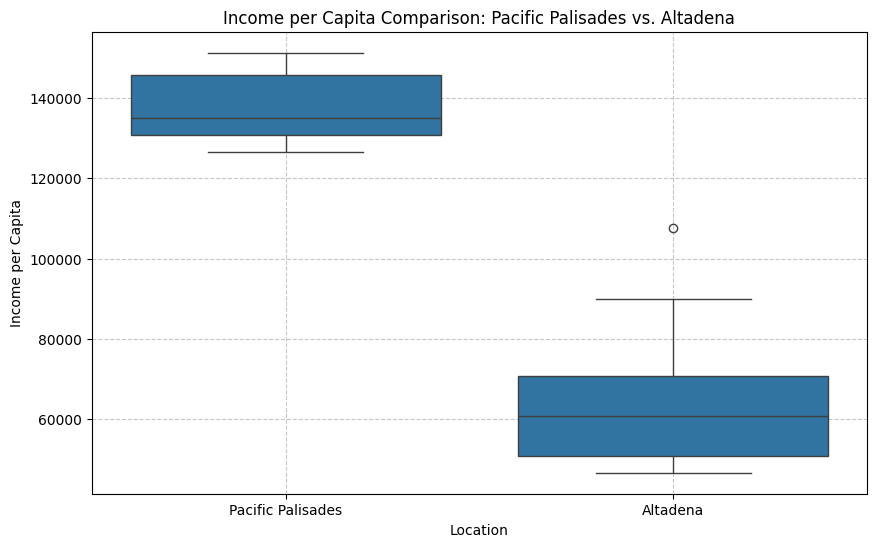

In [20]:
# visualization of income
pacific_palisades_df_copy = pacific_palisades_df.copy()
altadena_df_copy = altadena_df.copy()

pacific_palisades_df_copy['Location'] = 'Pacific Palisades'
altadena_df_copy['Location'] = 'Altadena'

combined_df = pd.concat([pacific_palisades_df_copy, altadena_df_copy])

plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df, x='Location', y='income_percap')
plt.xlabel('Location')
plt.ylabel('Income per Capita')
plt.title('Income per Capita Comparison: Pacific Palisades vs. Altadena')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [21]:
print("Info for fire_perimeters_df:")
fire_perimeters_df.info()
print("\nDescriptive statistics for fire_perimeters_df:")
display(fire_perimeters_df.describe())

print("\nDescriptive statistics for income_per_capita_df:")
display(income_per_capita_df.describe())

Info for fire_perimeters_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OBJECTID           5 non-null      int64  
 1   GlobalID           5 non-null      object 
 2   type               5 non-null      object 
 3   source             5 non-null      object 
 4   poly_DateCurrent   5 non-null      object 
 5   mission            5 non-null      object 
 6   incident_name      1 non-null      object 
 7   incident_number    0 non-null      float64
 8   area_acres         5 non-null      float64
 9   description        5 non-null      object 
 10  FireDiscoveryDate  0 non-null      float64
 11  CreationDate       4 non-null      object 
 12  EditDate           0 non-null      float64
 13  displayStatus      5 non-null      object 
dtypes: float64(4), int64(1), object(9)
memory usage: 692.0+ bytes

Descriptive statistics for fire_pe

,OBJECTID,incident_number,area_acres,FireDiscoveryDate,EditDate
count,5.000000,0.0,5.000000,0.0,0.0
mean,1282.400000,NaN,7697.503485,NaN,NaN
std,7.569676,NaN,10181.626531,NaN,NaN
min,1272.000000,NaN,42.770648,NaN,NaN
25%,1278.000000,NaN,831.390000,NaN,NaN
50%,1283.000000,NaN,959.722647,NaN,NaN
75%,1289.000000,NaN,13993.151114,NaN,NaN
max,1290.000000,NaN,22660.483014,NaN,NaN



Descriptive statistics for income_per_capita_df:


,tract,income_percap,ESRI_OID,Shape__Area,Shape__Length
count,2.495000e+03,2474.000000,2495.000000,2.495000e+03,2495.000000
mean,6.037403e+09,45484.309216,6089.000000,4.579716e+07,20273.817017
std,2.303896e+05,27987.076002,720.388784,4.270580e+08,34074.651234
min,6.037101e+09,580.000000,4842.000000,4.836532e+05,2815.257443
25%,6.037209e+09,25805.000000,5465.500000,5.921008e+06,10607.040729
50%,6.037403e+09,36784.000000,6089.000000,1.025761e+07,14365.057033
75%,6.037552e+09,56829.000000,6712.500000,1.835792e+07,19904.426714
max,6.037980e+09,214838.000000,7336.000000,1.608691e+10,915242.577112


In [22]:
gdown.download(id='119FMtX75vQe3Ov3VFIq4NveZXvgmVQNC', output='fire_perimeters.csv', quiet=False)

# Try reading the CSV with a more robust engine and handling bad lines
fire_perimeters_df = pd.read_csv('fire_perimeters.csv', engine='python', on_bad_lines='skip')
display(fire_perimeters_df.head())
fire_perimeters_df.info()

Downloading...
From: https://drive.google.com/uc?id=119FMtX75vQe3Ov3VFIq4NveZXvgmVQNC
To: /content/fire_perimeters.csv
100%|██████████| 169k/169k [00:00<00:00, 59.2MB/s]


{
{ "type": "Feature" "properties": { "OBJECTID": 1 "type": "Heat Perimeter" "Shape__Area": 2206.265625   "Shape__Length": 270.19971855191164 } "geometry": { "type": "Polygon" "coordinates": [ [ [ -118.100941643601999 34.166806139776 ]    [ -118.100902537595005 34.1667989317775 ]   [ -118.100874999590005 34.166793999778498 ] [ -118.100865926585996 34.166773654776797 ] [ -118.100841683577997 34.166720128772198 ] [ -118.100813983571001 34.166689493770399 ] [ -118.100796999566001 34.166670999769302 ] [ -118.100771955561996 34.166665653770202 ] [ -118.100708198549995 34.166652369772301 ] [ -118.100708194549995 34.166652041772302 ]         [ -118.100707999549996 34.166651999772299 ] [ -118.100703999521997 34.166319999735798 ]         [ -118.101202999606997 34.166333999708897 ] [ -118.101206999631998 34.166627999741202 ]       [ -118.101206732631994 34.166628114741201 ] [ -118.101206737631998 34.166628485741299 ] [ -118.101184030629    34.1666379177436 ]   [ -118.101162999625998 34.166646999745801 ] [ -118.101162784625998 34.166646743745801 ] [ -118.101162622626006 34.166646810745803 ] [ -118.101136811619    34.166616141743901 ] [ -118.101147797617003 34.166570181738201 ]         [ -118.101148934616006 34.1665528577362 ] [ -118.101150999612997 34.166514999731902 ] [ -118.101099999602994 34.166499999733098 ] [ -118.101044999595999 34.166523999738899 ] [ -118.101044584595996 34.166523970739 ] [ -118.100959999580994 34.1665179997431 ] [ -118.100893222571003 34.1665359347489 ] [ -118.100896190574005 34.166562727751703 ] [ -118.100900999578002 34.166602999755902 ] [ -118.100937999588993 34.166658999760003 ] [ -118.100974999602997 34.166750999767999 ] [ -118.100941999602 34.166805999776003 ] [ -118.100941753602001 34.166805955775999 ] [ -118.100941643601999 34.166806139776 ] ] ] } } NaN
                    "properties": { "OBJECTID": 3 "type": "Heat Perimeter" "Shape__Area": 3639.23828125 "Shape__Length": 250.30450191530349 } "geometry": { "type": "Polygon" "coordinates": [ [ [ -118.156260000041996 34.180448000128997 ] [ -118.156425000053005 34.180243000096901 ] [ -118.156612797091    34.180320846094801 ] [ -118.157086075186996 34.180516661089399 ] [ -118.157086075204006 34.180721653112002 ] [ -118.157086000204004 34.180721653112002 ] [ -118.157086000204004 34.180722000112098 ] [ -118.156591000120002 34.180722000140399 ] [ -118.156499953099001 34.180646632137197 ] [ -118.156260309041997 34.180448330129003 ]         [ -118.156260345042    34.180448285129003 ] [ -118.156260000041996 34.180448000128997 ] ] ] } } NaN                    NaN                  NaN                    NaN                        NaN                    NaN                  NaN                    NaN                  NaN                    NaN                  NaN                    NaN                  NaN                    NaN                  NaN                    NaN                  NaN                    NaN                  NaN                    NaN                          NaN                    NaN                NaN                    NaN                  NaN                    NaN                  NaN                    NaN                  NaN                    NaN               NaN                    NaN                NaN                    NaN                NaN                    NaN                  NaN                    NaN                  NaN                    NaN                  NaN                    NaN                  NaN                 NaN                  NaN                    NaN                  NaN                    NaN                       NaN
                    "properties": { "OBJECTID": 4 "type": "Heat Perimeter" "Shape__Area": 1464.55078125 "Shape__Length": 148.10679184373416 } "geometry": { "type": "Polygon" "coordinates": [ [ [ -118.084422113981006 34.180898636278101 ] [ -118.084446999980003 34.180840000270202 ] [ -118.084475240985    34.180841009268697 ] [ -118.084671109018998 34.180847694258297 ] [ -118.08470744003200

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 17 entries, ('{ "type": "Feature"', ' "properties": { "OBJECTID": 1', ' "type": "Heat Perimeter"', ' "Shape__Area": 2206.265625', ' "Shape__Length": 270.19971855191164 }', ' "geometry": { "type": "Polygon"', ' "coordinates": [ [ [ -118.100941643601999', ' 34.166806139776 ]', ' [ -118.100902537595005', ' 34.1667989317775 ]', ' [ -118.100874999590005', ' 34.166793999778498 ]', ' [ -118.100865926585996', ' 34.166773654776797 ]', ' [ -118.100841683577997', ' 34.166720128772198 ]', ' [ -118.100813983571001', ' 34.166689493770399 ]', ' [ -118.100796999566001', ' 34.166670999769302 ]', ' [ -118.100771955561996', ' 34.166665653770202 ]', ' [ -118.100708198549995', ' 34.166652369772301 ]', ' [ -118.100708194549995', ' 34.166652041772302 ]', ' [ -118.100707999549996', ' 34.166651999772299 ]', ' [ -118.100703999521997', ' 34.166319999735798 ]', ' [ -118.101202999606997', ' 34.166333999708897 ]', ' [ -118.101206999631998', ' 34.166627999741202 ]', 

In [23]:
import gdown
import json
import re
import geopandas as gpd

gdown.download(id='119FMtX75vQe3Ov3VFIq4NveZXvgmVQNC', output='fire_perimeters.txt', quiet=False)

# Read  entire content of the file as a string
with open('fire_perimeters.txt', 'r') as f:
    raw_content = f.read()

# normalize whitespace
cleaned_json_string = re.sub(r'\s+', ' ', raw_content).strip()

# fix missing commas within coordinate pairs
cleaned_json_string = re.sub(r'(\-?\d+\.?\d*(?:e[+\-]?\d+)?)\s+(\-?\d+\.?\d*(?:e[+\-]?\d+)?)', r'\1,\2', cleaned_json_string)

# fix general missing commas between JSON structural elements.
cleaned_json_string = re.sub(r'([}\]\d\"])\s*(?=[{\[\"\-])', r'\1,', cleaned_json_string)

match_features_array = re.search(r'("features":\s*\[.*?\])', cleaned_json_string)

if match_features_array:
    # Extract the full "features": [...] string
    features_array_full_str = match_features_array.group(1)
    # This regex is more robust to nested structures within the features array content
    features_inner_content_match = re.search(r'\[(.*?)\]', features_array_full_str, re.DOTALL)
    if features_inner_content_match:
        features_inner_content = features_inner_content_match.group(1)
    else:
        # Fallback if inner content cannot be extracted cleanly, treat as no match
        features_inner_content = ""

    if features_inner_content:
        # Replace `} NaN {` with `},{` to correctly separate features
        fixed_features_inner_content = re.sub(r'}\s*NaN\s*{', '},{', features_inner_content)

        # Reconstruct the full features array string with the fixed content
        fixed_features_array_str = f'"features": [{fixed_features_inner_content}]'

        # Replace the original features array content with the fixed one in the main string.
        cleaned_json_string = cleaned_json_string.replace(features_array_full_str, fixed_features_array_str)
    else:
        print("Warning: Could not extract inner content of 'features' array. Proceeding with global NaN fix.")
        # Fallback to global NaN fix if inner extraction fails
        cleaned_json_string = re.sub(r'}\s*NaN\s*{', '},{', cleaned_json_string)
        if not cleaned_json_string.startswith('['):
            cleaned_json_string = f"[{cleaned_json_string}]"

elif ' NaN ' in cleaned_json_string:
    print("Warning: 'features' array structure not found. Applying ' NaN ' fix to whole content.")
    cleaned_json_string = re.sub(r'}\s*NaN\s*{', '},{', cleaned_json_string)
    if not cleaned_json_string.startswith('['): # Only wrap if not already an array
        cleaned_json_string = f"[{cleaned_json_string}]"


# loading the final cleaned string as a single JSON object (FeatureCollection or a list of Features)
try:
    geojson_data = json.loads(cleaned_json_string)
except json.JSONDecodeError as e:
    print(f"FATAL ERROR: Could not parse the final cleaned JSON string: {e}")
    print(f"Problematic final string snippet: {cleaned_json_string[:1000]}...")
    raise ValueError("Failed to parse cleaned GeoJSON content into a valid structure.")


# Extract features from the parsed GeoJSON object
features_list = []
if isinstance(geojson_data, dict):
    if geojson_data.get("type") == "FeatureCollection":
        features_list = geojson_data.get("features", [])
    elif geojson_data.get("type") == "Feature":
        features_list = [geojson_data]
    else:
        print(f"Warning: Parsed top-level object is a dict but not a GeoJSON Feature or FeatureCollection. Type: {geojson_data.get('type')}")
elif isinstance(geojson_data, list):
    features_list = geojson_data
else:
    raise ValueError("Parsed GeoJSON content is not a dictionary or list as expected for GeoJSON.")

if not features_list:
    raise ValueError("No GeoJSON features found in the parsed data.")

# Create a GeoDataFrame from the list of parsed GeoJSON features
# Ensure all items in the list are actual GeoJSON Feature dictionaries for from_features.
valid_features = []
for f in features_list:
    if isinstance(f, dict) and 'geometry' in f and 'properties' in f:
        valid_features.append(f)
    else:
        print(f"Skipping object not conforming to GeoJSON Feature standard: {f}")

if not valid_features:
    raise ValueError("No valid GeoJSON features found after filtering.")

fire_perimeters_gdf = gpd.GeoDataFrame.from_features(valid_features)

display(fire_perimeters_gdf.head())
fire_perimeters_gdf.info()

Downloading...
From: https://drive.google.com/uc?id=119FMtX75vQe3Ov3VFIq4NveZXvgmVQNC
To: /content/fire_perimeters.txt
100%|██████████| 169k/169k [00:00<00:00, 68.0MB/s]


,geometry,OBJECTID,type,Shape__Area,Shape__Length
0,"POLYGON ((-118.10094 34.16681, -118.1009 34.16...",1,Heat Perimeter,2206.265625,270.199719
1,"POLYGON ((-118.13596 34.17789, -118.13593 34.1...",2,Heat Perimeter,20710.207031,839.204218
2,"POLYGON ((-118.15626 34.18045, -118.15643 34.1...",3,Heat Perimeter,3639.238281,250.304502
3,"POLYGON ((-118.08442 34.1809, -118.08445 34.18...",4,Heat Perimeter,1464.550781,148.106792
4,"POLYGON ((-118.15659 34.18148, -118.15659 34.1...",5,Heat Perimeter,4132.753906,247.960744


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   geometry       20 non-null     geometry
 1   OBJECTID       20 non-null     int64   
 2   type           20 non-null     object  
 3   Shape__Area    20 non-null     float64 
 4   Shape__Length  20 non-null     float64 
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 932.0+ bytes


In [24]:
palisades_fire_perimeter_gdf = gpd.read_file('/content/Palisades_Perimeter_20250121.geojson')

# concatenate the two GeoDataFrames
fire_perimeters_gdf = pd.concat([fire_perimeters_gdf, palisades_fire_perimeter_gdf], ignore_index=True)

# display the head and info of the updated GeoDataFrame
display(fire_perimeters_gdf.head())
fire_perimeters_gdf.info()

/usr/local/lib/python3.12/dist-packages/geopandas/array.py:1755: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))


,geometry,OBJECTID,type,Shape__Area,Shape__Length
0,"POLYGON ((-118.10094 34.16681, -118.1009 34.16...",1,Heat Perimeter,2206.265625,270.199719
1,"POLYGON ((-118.13596 34.17789, -118.13593 34.1...",2,Heat Perimeter,20710.207031,839.204218
2,"POLYGON ((-118.15626 34.18045, -118.15643 34.1...",3,Heat Perimeter,3639.238281,250.304502
3,"POLYGON ((-118.08442 34.1809, -118.08445 34.18...",4,Heat Perimeter,1464.550781,148.106792
4,"POLYGON ((-118.15659 34.18148, -118.15659 34.1...",5,Heat Perimeter,4132.753906,247.960744


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   geometry       41 non-null     geometry
 1   OBJECTID       41 non-null     int64   
 2   type           41 non-null     object  
 3   Shape__Area    41 non-null     float64 
 4   Shape__Length  41 non-null     float64 
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 1.7+ KB


In [25]:
palisades_fire_perimeter_gdf = gpd.read_file('/content/Palisades_Perimeter_20250121.geojson')

# Ensure both GeoDataFrames have the same CRS before concatenation
if palisades_fire_perimeter_gdf.crs is None:
    palisades_fire_perimeter_gdf = palisades_fire_perimeter_gdf.set_crs(fire_perimeters_gdf.crs)
elif palisades_fire_perimeter_gdf.crs != fire_perimeters_gdf.crs:
    palisades_fire_perimeter_gdf = palisades_fire_perimeter_gdf.to_crs(fire_perimeters_gdf.crs)

# Concatenate the two GeoDataFrames
fire_perimeters_gdf = pd.concat([fire_perimeters_gdf, palisades_fire_perimeter_gdf], ignore_index=True)

# Display the head and info of the updated GeoDataFrame
display(fire_perimeters_gdf.head())
fire_perimeters_gdf.info()

,geometry,OBJECTID,type,Shape__Area,Shape__Length
0,"POLYGON ((-118.10094 34.16681, -118.1009 34.16...",1,Heat Perimeter,2206.265625,270.199719
1,"POLYGON ((-118.13596 34.17789, -118.13593 34.1...",2,Heat Perimeter,20710.207031,839.204218
2,"POLYGON ((-118.15626 34.18045, -118.15643 34.1...",3,Heat Perimeter,3639.238281,250.304502
3,"POLYGON ((-118.08442 34.1809, -118.08445 34.18...",4,Heat Perimeter,1464.550781,148.106792
4,"POLYGON ((-118.15659 34.18148, -118.15659 34.1...",5,Heat Perimeter,4132.753906,247.960744


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   geometry       62 non-null     geometry
 1   OBJECTID       62 non-null     int64   
 2   type           62 non-null     object  
 3   Shape__Area    62 non-null     float64 
 4   Shape__Length  62 non-null     float64 
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 2.6+ KB


Establishing parameters for analysis

In [27]:
fire_event_date = pd.to_datetime('2024-09-01')

pre_treatment_start = fire_event_date - pd.DateOffset(months=6)
pre_treatment_end = fire_event_date - pd.DateOffset(days=1)

post_treatment_start = fire_event_date + pd.DateOffset(days=1)
post_treatment_end = fire_event_date + pd.DateOffset(months=6)

print(f"Fire Event Date: {fire_event_date.strftime('%Y-%m-%d')}")
print(f"Pre-treatment Period: {pre_treatment_start.strftime('%Y-%m-%d')} to {pre_treatment_end.strftime('%Y-%m-%d')}")
print(f"Post-treatment Period: {post_treatment_start.strftime('%Y-%m-%d')} to {post_treatment_end.strftime('%Y-%m-%d')}")

Fire Event Date: 2024-09-01
Pre-treatment Period: 2024-03-01 to 2024-08-31
Post-treatment Period: 2024-09-02 to 2025-03-01


In [29]:
selected_zips_df = zhvi[zhvi['RegionName'].isin([palisades_zip, altadena_zip])]

# List of known non-date columns that should be excluded from date column identification
non_date_cols = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName']

# Identify date columns dynamically by checking if the column name can be converted to a datetime object
date_columns = [col for col in selected_zips_df.columns
                if col not in non_date_cols and not pd.isna(pd.to_datetime(col, errors='coerce'))]

# Select only the RegionName and identified date columns
zhvi_filtered_columns = selected_zips_df[['RegionName'] + date_columns]

# Melt the DataFrame to transform date columns into a long format
zhvi_melted_df = zhvi_filtered_columns.melt(id_vars=['RegionName'], var_name='Date', value_name='ZHVI')

# Convert 'Date' column to datetime objects
zhvi_melted_df['Date'] = pd.to_datetime(zhvi_melted_df['Date'])

# Filter for pre- and post-treatment periods
pre_treatment_mask = (zhvi_melted_df['Date'] >= pre_treatment_start) & (zhvi_melted_df['Date'] <= pre_treatment_end)
post_treatment_mask = (zhvi_melted_df['Date'] >= post_treatment_start) & (zhvi_melted_df['Date'] <= post_treatment_end)

filtered_zhvi_df = zhvi_melted_df[pre_treatment_mask | post_treatment_mask].copy()

# Add 'Period' column
filtered_zhvi_df.loc[pre_treatment_mask, 'Period'] = 'Pre-treatment'
filtered_zhvi_df.loc[post_treatment_mask, 'Period'] = 'Post-treatment'

# Add 'Location' column
filtered_zhvi_df['Location'] = filtered_zhvi_df['RegionName'].apply(lambda x: 'Pacific Palisades' if x == palisades_zip else 'Altadena')

# Display the head and info of the resulting DataFrame
display(filtered_zhvi_df.head())
display(filtered_zhvi_df.tail())
filtered_zhvi_df.info()

,RegionName,Date,ZHVI,Period,Location
580,91001,2024-03-31,1.210016e+06,Pre-treatment,Altadena
581,90272,2024-03-31,3.440472e+06,Pre-treatment,Pacific Palisades
582,91001,2024-04-30,1.212757e+06,Pre-treatment,Altadena
583,90272,2024-04-30,3.413677e+06,Pre-treatment,Pacific Palisades
584,91001,2024-05-31,1.219451e+06,Pre-treatment,Altadena


,RegionName,Date,ZHVI,Period,Location
599,90272,2024-12-31,3.346282e+06,Post-treatment,Pacific Palisades
600,91001,2025-01-31,1.266487e+06,Post-treatment,Altadena
601,90272,2025-01-31,3.353129e+06,Post-treatment,Pacific Palisades
602,91001,2025-02-28,1.260810e+06,Post-treatment,Altadena
603,90272,2025-02-28,3.352518e+06,Post-treatment,Pacific Palisades


<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 580 to 603
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionName  24 non-null     int64         
 1   Date        24 non-null     datetime64[ns]
 2   ZHVI        24 non-null     float64       
 3   Period      24 non-null     object        
 4   Location    24 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 1.1+ KB


Calculating Average Home Values

In [30]:
average_zhvi = filtered_zhvi_df.groupby(['Location', 'Period'])['ZHVI'].mean()
display(average_zhvi)

Location           Period        
Altadena           Post-treatment    1.260734e+06
                   Pre-treatment     1.222267e+06
Pacific Palisades  Post-treatment    3.336447e+06
                   Pre-treatment     3.372660e+06
Name: ZHVI, dtype: float64

In [31]:
altadena_pre = average_zhvi.loc['Altadena', 'Pre-treatment']
altadena_post = average_zhvi.loc['Altadena', 'Post-treatment']
pacific_palisades_pre = average_zhvi.loc['Pacific Palisades', 'Pre-treatment']
pacific_palisades_post = average_zhvi.loc['Pacific Palisades', 'Post-treatment']

# Calculate the treatment effect for Pacific Palisades
pal_diff = pacific_palisades_post - pacific_palisades_pre

# Calculate the change in the control group (Altadena)
alta_diff = altadena_post - altadena_pre

# Calculate the Difference-in-Differences estimate
did_estimate = pal_diff - alta_diff

print(f"Change in ZHVI for Pacific Palisades (Post - Pre): {pal_diff:,.2f}")
print(f"Change in ZHVI for Altadena (Post - Pre): {alta_diff:,.2f}")
print(f"Difference-in-Differences Estimate: {did_estimate:,.2f}")

Change in ZHVI for Pacific Palisades (Post - Pre): -36,213.34
Change in ZHVI for Altadena (Post - Pre): 38,467.17
Difference-in-Differences Estimate: -74,680.51


Visualization of Average Home Value

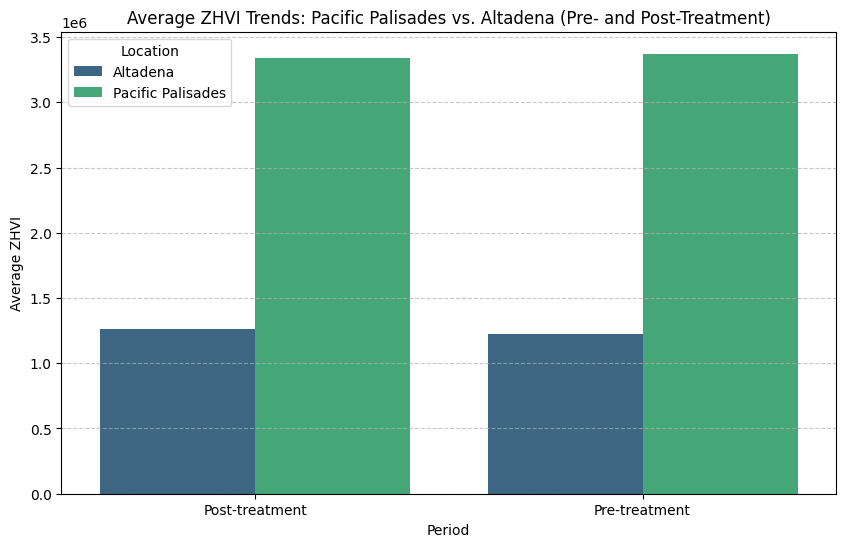

In [32]:
plot_df = average_zhvi.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x='Period', y='ZHVI', hue='Location', palette='viridis')
plt.title('Average ZHVI Trends: Pacific Palisades vs. Altadena (Pre- and Post-Treatment)')
plt.xlabel('Period')
plt.ylabel('Average ZHVI')
plt.legend(title='Location')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [33]:
fire_event_date = pd.to_datetime('2025-01-07')

pre_treatment_start = fire_event_date - pd.DateOffset(months=6)
pre_treatment_end = fire_event_date - pd.DateOffset(days=1)

post_treatment_start = fire_event_date + pd.DateOffset(days=1)
post_treatment_end = fire_event_date + pd.DateOffset(months=6)

print(f"Fire Event Date: {fire_event_date.strftime('%Y-%m-%d')}")
print(f"Pre-treatment Period: {pre_treatment_start.strftime('%Y-%m-%d')} to {pre_treatment_end.strftime('%Y-%m-%d')}")
print(f"Post-treatment Period: {post_treatment_start.strftime('%Y-%m-%d')} to {post_treatment_end.strftime('%Y-%m-%d')}")

Fire Event Date: 2025-01-07
Pre-treatment Period: 2024-07-07 to 2025-01-06
Post-treatment Period: 2025-01-08 to 2025-07-07


In [34]:
selected_zips_df = zhvi[zhvi['RegionName'].isin([palisades_zip, altadena_zip])]

# List of known non-date columns that should be excluded from date column identification
non_date_cols = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName']

# Identify date columns dynamically by checking if the column name can be converted to a datetime object
date_columns = [col for col in selected_zips_df.columns
                if col not in non_date_cols and not pd.isna(pd.to_datetime(col, errors='coerce'))]

# Select only the RegionName and identified date columns
zhvi_filtered_columns = selected_zips_df[['RegionName'] + date_columns]

# Melt the DataFrame to transform date columns into a long format
zhvi_melted_df = zhvi_filtered_columns.melt(id_vars=['RegionName'], var_name='Date', value_name='ZHVI')

# Convert 'Date' column to datetime objects
zhvi_melted_df['Date'] = pd.to_datetime(zhvi_melted_df['Date'])

# Filter for pre- and post-treatment periods using the updated dates
pre_treatment_mask = (zhvi_melted_df['Date'] >= pre_treatment_start) & (zhvi_melted_df['Date'] <= pre_treatment_end)
post_treatment_mask = (zhvi_melted_df['Date'] >= post_treatment_start) & (zhvi_melted_df['Date'] <= post_treatment_end)

filtered_zhvi_df = zhvi_melted_df[pre_treatment_mask | post_treatment_mask].copy()

# Add 'Period' column
filtered_zhvi_df.loc[pre_treatment_mask, 'Period'] = 'Pre-treatment'
filtered_zhvi_df.loc[post_treatment_mask, 'Period'] = 'Post-treatment'

# Add 'Location' column
filtered_zhvi_df['Location'] = filtered_zhvi_df['RegionName'].apply(lambda x: 'Pacific Palisades' if x == palisades_zip else 'Altadena')

# Display the head and info of the resulting DataFrame
display(filtered_zhvi_df.head())
display(filtered_zhvi_df.tail())
filtered_zhvi_df.info()

,RegionName,Date,ZHVI,Period,Location
588,91001,2024-07-31,1.229729e+06,Pre-treatment,Altadena
589,90272,2024-07-31,3.327807e+06,Pre-treatment,Pacific Palisades
590,91001,2024-08-31,1.238266e+06,Pre-treatment,Altadena
591,90272,2024-08-31,3.313588e+06,Pre-treatment,Pacific Palisades
592,91001,2024-09-30,1.249414e+06,Pre-treatment,Altadena


,RegionName,Date,ZHVI,Period,Location
607,90272,2025-04-30,3.331463e+06,Post-treatment,Pacific Palisades
608,91001,2025-05-31,1.203168e+06,Post-treatment,Altadena
609,90272,2025-05-31,3.305761e+06,Post-treatment,Pacific Palisades
610,91001,2025-06-30,1.179258e+06,Post-treatment,Altadena
611,90272,2025-06-30,3.256415e+06,Post-treatment,Pacific Palisades


<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 588 to 611
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionName  24 non-null     int64         
 1   Date        24 non-null     datetime64[ns]
 2   ZHVI        24 non-null     float64       
 3   Period      24 non-null     object        
 4   Location    24 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 1.1+ KB


In [35]:
average_zhvi = filtered_zhvi_df.groupby(['Location', 'Period'])['ZHVI'].mean()
display(average_zhvi)

Location           Period        
Altadena           Post-treatment    1.230378e+06
                   Pre-treatment     1.250850e+06
Pacific Palisades  Post-treatment    3.324146e+06
                   Pre-treatment     3.325738e+06
Name: ZHVI, dtype: float64

In [36]:
altadena_pre = average_zhvi.loc['Altadena', 'Pre-treatment']
altadena_post = average_zhvi.loc['Altadena', 'Post-treatment']
pacific_palisades_pre = average_zhvi.loc['Pacific Palisades', 'Pre-treatment']
pacific_palisades_post = average_zhvi.loc['Pacific Palisades', 'Post-treatment']

# Calculate the treatment effect for Pacific Palisades
pal_diff = pacific_palisades_post - pacific_palisades_pre

# Calculate the change in the control group (Altadena)
alta_diff = altadena_post - altadena_pre

# Calculate the Difference-in-Differences estimate
did_estimate = pal_diff - alta_diff

print(f"Change in ZHVI for Pacific Palisades (Post - Pre): {pal_diff:,.2f}")
print(f"Change in ZHVI for Altadena (Post - Pre): {alta_diff:,.2f}")
print(f"Difference-in-Differences Estimate: {did_estimate:,.2f}")

Change in ZHVI for Pacific Palisades (Post - Pre): -1,591.82
Change in ZHVI for Altadena (Post - Pre): -20,472.95
Difference-in-Differences Estimate: 18,881.13


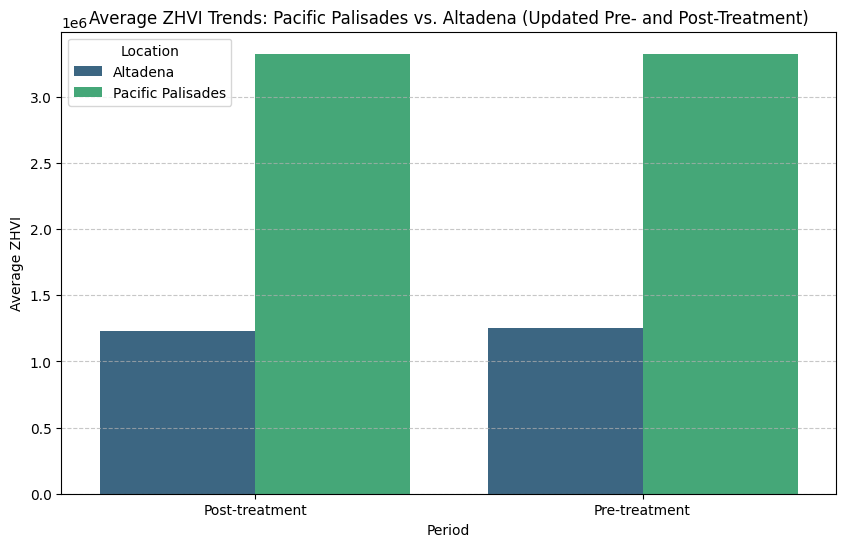

In [37]:
plot_df = average_zhvi.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x='Period', y='ZHVI', hue='Location', palette='viridis')
plt.title('Average ZHVI Trends: Pacific Palisades vs. Altadena (Updated Pre- and Post-Treatment)')
plt.xlabel('Period')
plt.ylabel('Average ZHVI')
plt.legend(title='Location')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

long term ZVHI trends

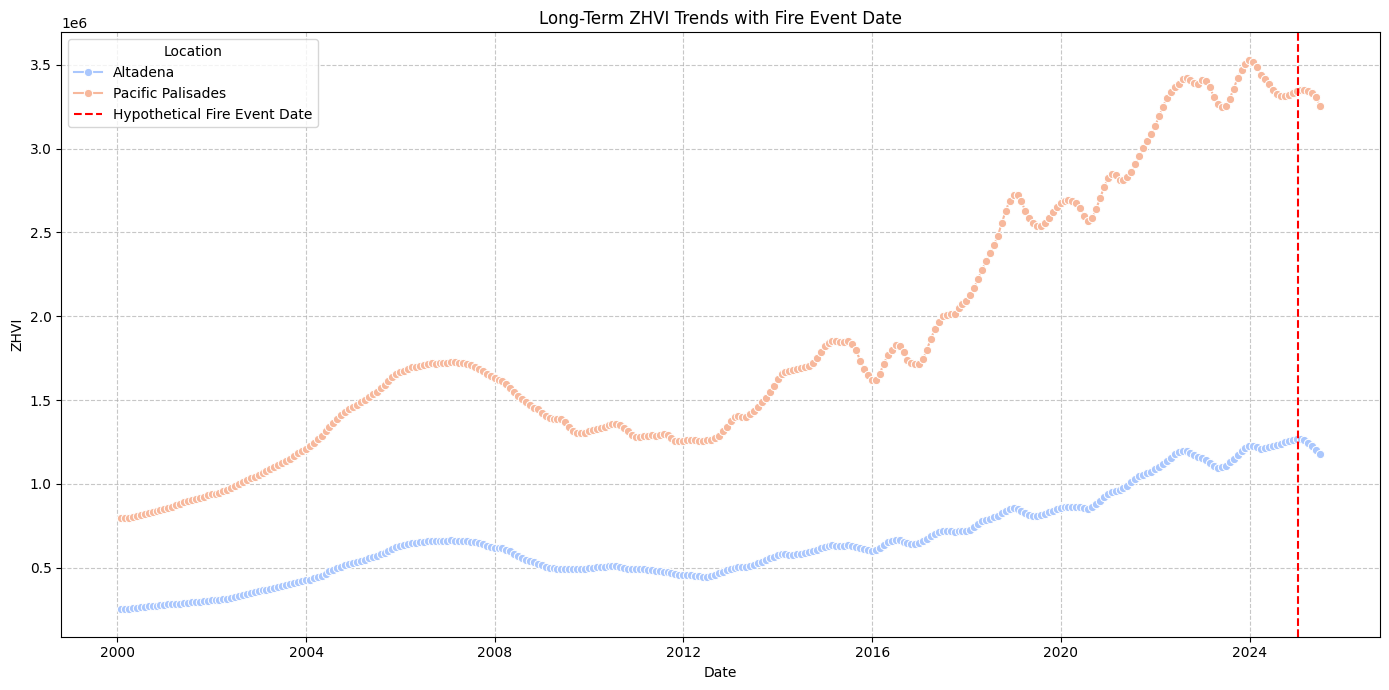

In [38]:
long_term_zhvi_plot_df = zhvi_melted_df[
    (zhvi_melted_df['RegionName'].isin([palisades_zip, altadena_zip])) &
    (zhvi_melted_df['Date'] <= post_treatment_end)
].copy()

# Add 'Location' column for plotting
long_term_zhvi_plot_df['Location'] = long_term_zhvi_plot_df['RegionName'].apply(lambda x: 'Pacific Palisades' if x == palisades_zip else 'Altadena')

plt.figure(figsize=(14, 7))
sns.lineplot(data=long_term_zhvi_plot_df, x='Date', y='ZHVI', hue='Location', marker='o', palette='coolwarm')
plt.axvline(fire_event_date, color='red', linestyle='--', label='Hypothetical Fire Event Date')
plt.title('Long-Term ZHVI Trends with Fire Event Date')
plt.xlabel('Date')
plt.ylabel('ZHVI')
plt.legend(title='Location')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [39]:
non_date_cols = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName']

# Identify date columns dynamically by checking if the column name can be converted to a datetime object
date_columns = [col for col in zhvi.columns
                if col not in non_date_cols and not pd.isna(pd.to_datetime(col, errors='coerce'))]

# Melt the DataFrame to transform date columns into a long format
zhvi_long_df = zhvi.melt(id_vars=non_date_cols, var_name='Date', value_name='ZHVI')

# Convert 'Date' column to datetime objects
zhvi_long_df['Date'] = pd.to_datetime(zhvi_long_df['Date'])

display(zhvi_long_df.head())
zhvi_long_df.info()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Date,ZHVI
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,2000-01-31,212188.813406
1,61148,2,8701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,2000-01-31,115971.651726
2,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,104601.524243
3,62080,4,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,174036.446414
4,91733,5,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,103494.335586


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8104404 entries, 0 to 8104403
Data columns (total 11 columns):
 #   Column      Dtype         
---  ------      -----         
 0   RegionID    int64         
 1   SizeRank    int64         
 2   RegionName  int64         
 3   RegionType  object        
 4   StateName   object        
 5   State       object        
 6   City        object        
 7   Metro       object        
 8   CountyName  object        
 9   Date        datetime64[ns]
 10  ZHVI        float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 680.1+ MB



Define Hypothetical Fire Event and Periods


In [40]:
fire_event_date = pd.to_datetime('2025-01-07')

pre_treatment_start = fire_event_date - pd.DateOffset(months=6)
pre_treatment_end = fire_event_date - pd.DateOffset(days=1)

post_treatment_start = fire_event_date + pd.DateOffset(days=1)
post_treatment_end = fire_event_date + pd.DateOffset(months=6)

print(f"Fire Event Date: {fire_event_date.strftime('%Y-%m-%d')}")
print(f"Pre-treatment Period: {pre_treatment_start.strftime('%Y-%m-%d')} to {pre_treatment_end.strftime('%Y-%m-%d')}")
print(f"Post-treatment Period: {post_treatment_start.strftime('%Y-%m-%d')} to {post_treatment_end.strftime('%Y-%m-%d')}")

Fire Event Date: 2025-01-07
Pre-treatment Period: 2024-07-07 to 2025-01-06
Post-treatment Period: 2025-01-08 to 2025-07-07


Filter ZHVI for Palisades and Altadena


In [41]:
filtered_zhvi_df = zhvi_long_df[zhvi_long_df['RegionName'].isin([palisades_zip, altadena_zip])].copy()

# Filter for pre- and post-treatment periods
pre_treatment_mask = (filtered_zhvi_df['Date'] >= pre_treatment_start) & (filtered_zhvi_df['Date'] <= pre_treatment_end)
post_treatment_mask = (filtered_zhvi_df['Date'] >= post_treatment_start) & (filtered_zhvi_df['Date'] <= post_treatment_end)

filtered_zhvi_df = filtered_zhvi_df[pre_treatment_mask | post_treatment_mask].copy()

# Add 'Period' column
filtered_zhvi_df.loc[pre_treatment_mask, 'Period'] = 'Pre-treatment'
filtered_zhvi_df.loc[post_treatment_mask, 'Period'] = 'Post-treatment'

# Add 'Location' column
filtered_zhvi_df['Location'] = filtered_zhvi_df['RegionName'].apply(lambda x: 'Pacific Palisades' if x == palisades_zip else 'Altadena')

# Display the head and info of the resulting DataFrame
display(filtered_zhvi_df.head())
display(filtered_zhvi_df.tail())
filtered_zhvi_df.info()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Date,ZHVI,Period,Location
7738514,96265,2522,91001,zip,CA,CA,Altadena,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2024-07-31,1.229729e+06,Pre-treatment,Altadena
7741552,96120,5594,90272,zip,CA,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2024-07-31,3.327807e+06,Pre-treatment,Pacific Palisades
7764827,96265,2522,91001,zip,CA,CA,Altadena,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2024-08-31,1.238266e+06,Pre-treatment,Altadena
7767865,96120,5594,90272,zip,CA,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2024-08-31,3.313588e+06,Pre-treatment,Pacific Palisades
7791140,96265,2522,91001,zip,CA,CA,Altadena,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2024-09-30,1.249414e+06,Pre-treatment,Altadena


,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Date,ZHVI,Period,Location
7978369,96120,5594,90272,zip,CA,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2025-04-30,3.331463e+06,Post-treatment,Pacific Palisades
8001644,96265,2522,91001,zip,CA,CA,Altadena,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2025-05-31,1.203168e+06,Post-treatment,Altadena
8004682,96120,5594,90272,zip,CA,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2025-05-31,3.305761e+06,Post-treatment,Pacific Palisades
8027957,96265,2522,91001,zip,CA,CA,Altadena,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2025-06-30,1.179258e+06,Post-treatment,Altadena
8030995,96120,5594,90272,zip,CA,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2025-06-30,3.256415e+06,Post-treatment,Pacific Palisades


<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 7738514 to 8030995
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    24 non-null     int64         
 1   SizeRank    24 non-null     int64         
 2   RegionName  24 non-null     int64         
 3   RegionType  24 non-null     object        
 4   StateName   24 non-null     object        
 5   State       24 non-null     object        
 6   City        24 non-null     object        
 7   Metro       24 non-null     object        
 8   CountyName  24 non-null     object        
 9   Date        24 non-null     datetime64[ns]
 10  ZHVI        24 non-null     float64       
 11  Period      24 non-null     object        
 12  Location    24 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 2.6+ KB


**Reasoning**:
The `NameError` occurred because `palisades_zip` and `altadena_zip` were not defined in the current execution context. I need to re-declare these variables at the beginning of the code block where they are used.



In [42]:
palisades_zip = 90272
altadena_zip = 91001

filtered_zhvi_df = zhvi_long_df[zhvi_long_df['RegionName'].isin([palisades_zip, altadena_zip])].copy()

# Filter for pre- and post-treatment periods
pre_treatment_mask = (filtered_zhvi_df['Date'] >= pre_treatment_start) & (filtered_zhvi_df['Date'] <= pre_treatment_end)
post_treatment_mask = (filtered_zhvi_df['Date'] >= post_treatment_start) & (filtered_zhvi_df['Date'] <= post_treatment_end)

filtered_zhvi_df = filtered_zhvi_df[pre_treatment_mask | post_treatment_mask].copy()

# Add 'Period' column
filtered_zhvi_df.loc[pre_treatment_mask, 'Period'] = 'Pre-treatment'
filtered_zhvi_df.loc[post_treatment_mask, 'Period'] = 'Post-treatment'

# Add 'Location' column
filtered_zhvi_df['Location'] = filtered_zhvi_df['RegionName'].apply(lambda x: 'Pacific Palisades' if x == palisades_zip else 'Altadena')

# Display the head and info of the resulting DataFrame
display(filtered_zhvi_df.head())
display(filtered_zhvi_df.tail())
filtered_zhvi_df.info()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Date,ZHVI,Period,Location
7738514,96265,2522,91001,zip,CA,CA,Altadena,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2024-07-31,1.229729e+06,Pre-treatment,Altadena
7741552,96120,5594,90272,zip,CA,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2024-07-31,3.327807e+06,Pre-treatment,Pacific Palisades
7764827,96265,2522,91001,zip,CA,CA,Altadena,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2024-08-31,1.238266e+06,Pre-treatment,Altadena
7767865,96120,5594,90272,zip,CA,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2024-08-31,3.313588e+06,Pre-treatment,Pacific Palisades
7791140,96265,2522,91001,zip,CA,CA,Altadena,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2024-09-30,1.249414e+06,Pre-treatment,Altadena


,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Date,ZHVI,Period,Location
7978369,96120,5594,90272,zip,CA,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2025-04-30,3.331463e+06,Post-treatment,Pacific Palisades
8001644,96265,2522,91001,zip,CA,CA,Altadena,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2025-05-31,1.203168e+06,Post-treatment,Altadena
8004682,96120,5594,90272,zip,CA,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2025-05-31,3.305761e+06,Post-treatment,Pacific Palisades
8027957,96265,2522,91001,zip,CA,CA,Altadena,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2025-06-30,1.179258e+06,Post-treatment,Altadena
8030995,96120,5594,90272,zip,CA,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2025-06-30,3.256415e+06,Post-treatment,Pacific Palisades


<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 7738514 to 8030995
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    24 non-null     int64         
 1   SizeRank    24 non-null     int64         
 2   RegionName  24 non-null     int64         
 3   RegionType  24 non-null     object        
 4   StateName   24 non-null     object        
 5   State       24 non-null     object        
 6   City        24 non-null     object        
 7   Metro       24 non-null     object        
 8   CountyName  24 non-null     object        
 9   Date        24 non-null     datetime64[ns]
 10  ZHVI        24 non-null     float64       
 11  Period      24 non-null     object        
 12  Location    24 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 2.6+ KB


Calculate Average Pre and Post-Fire Housing Prices


In [43]:
average_zhvi = filtered_zhvi_df.groupby(['Location', 'Period'])['ZHVI'].mean()
display(average_zhvi)

Location           Period        
Altadena           Post-treatment    1.230378e+06
                   Pre-treatment     1.250850e+06
Pacific Palisades  Post-treatment    3.324146e+06
                   Pre-treatment     3.325738e+06
Name: ZHVI, dtype: float64

In [45]:
# creating binary values for DiD
filtered_zhvi_df['Treatment'] = filtered_zhvi_df['Location'].apply(lambda x: 1 if x == 'Pacific Palisades' else 0)
filtered_zhvi_df['Post'] = filtered_zhvi_df['Period'].apply(lambda x: 1 if x == 'Post-treatment' else 0)
filtered_zhvi_df['Interaction'] = filtered_zhvi_df['Treatment'] * filtered_zhvi_df['Post']
display(filtered_zhvi_df.head())

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Date,ZHVI,Period,Location,Treatment,Post,Interaction
7738514,96265,2522,91001,zip,CA,CA,Altadena,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2024-07-31,1.229729e+06,Pre-treatment,Altadena,0,0,0
7741552,96120,5594,90272,zip,CA,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2024-07-31,3.327807e+06,Pre-treatment,Pacific Palisades,1,0,0
7764827,96265,2522,91001,zip,CA,CA,Altadena,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2024-08-31,1.238266e+06,Pre-treatment,Altadena,0,0,0
7767865,96120,5594,90272,zip,CA,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2024-08-31,3.313588e+06,Pre-treatment,Pacific Palisades,1,0,0
7791140,96265,2522,91001,zip,CA,CA,Altadena,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2024-09-30,1.249414e+06,Pre-treatment,Altadena,0,0,0


In [46]:
import statsmodels.formula.api as smf

# Define the DiD regression model
# ZHVI = beta0 + beta1*Treatment + beta2*Post + beta3*Interaction + epsilon
model = smf.ols('ZHVI ~ Treatment + Post + Interaction', data=filtered_zhvi_df)

# Fit the model
results = model.fit()

# Display the regression summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   ZHVI   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.179e+04
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           1.23e-32
Time:                        05:55:55   Log-Likelihood:                -276.88
No. Observations:                  24   AIC:                             561.8
Df Residuals:                      20   BIC:                             566.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.251e+06   1.11e+04    112.873      